## Домашняя работа 5. 
![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат домашней работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## Данные


В этой домашней работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC. Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data.adult.csv", na_values="?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [3]:
df.dropna(inplace=True)

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15347 entries, 0 to 16279
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15347 non-null  int64 
 1   workclass       15347 non-null  object
 2   fnlwgt          15347 non-null  int64 
 3   education       15347 non-null  object
 4   education-num   15347 non-null  int64 
 5   marital-status  15347 non-null  object
 6   occupation      15347 non-null  object
 7   relationship    15347 non-null  object
 8   race            15347 non-null  object
 9   sex             15347 non-null  object
 10  capital-gain    15347 non-null  int64 
 11  capital-loss    15347 non-null  int64 
 12  hours-per-week  15347 non-null  int64 
 13  >50K,<=50K      15347 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.8+ MB


In [5]:
y = df.iloc[:, -1].map(lambda x: 1 if x==">50K" else 0).values
df.drop(">50K,<=50K", axis = 1, inplace=True)

df_int_only = df.iloc[:,(df.dtypes == "int64").values]
df_int_only.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

In [6]:
# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 41)}

clf_knn = GridSearchCV(knn, knn_params, scoring='roc_auc')
clf_knn.fit(df_int_only, y)

mean_test_score_knn = clf_knn.cv_results_["mean_test_score"]
std_test_score_knn = clf_knn.cv_results_["std_test_score"]

In [7]:
# Дерево
tree = DecisionTreeClassifier()
tree_params = {"max_depth": range(1, 41)}

clf_tree = GridSearchCV(tree, tree_params, scoring='roc_auc')
clf_tree.fit(df_int_only, y)

mean_test_score_tree = clf_tree.cv_results_["mean_test_score"]
std_test_score_tree = clf_tree.cv_results_["std_test_score"]

In [8]:
# SGD Linear Classifier
sgd = SGDClassifier(max_iter=10000)
sgd_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                       'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}

clf_sgd = GridSearchCV(sgd, sgd_params, scoring='roc_auc')
clf_sgd.fit(df_int_only, y)

mean_test_score_sgd = clf_sgd.cv_results_["mean_test_score"]
std_test_score_sgd = clf_sgd.cv_results_["std_test_score"]

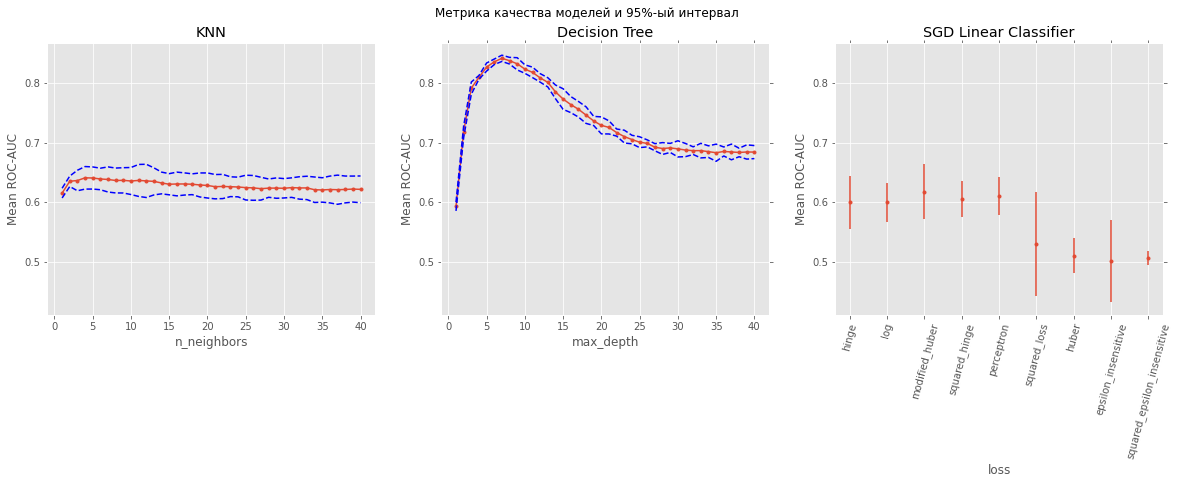

In [9]:
fig, axes = plt.subplots(1,3,sharey=True, figsize=(20, 5))
axes[0].plot(knn_params["n_neighbors"], mean_test_score_knn, marker='.')
axes[0].plot(knn_params["n_neighbors"], mean_test_score_knn+1.96*std_test_score_knn, linestyle='--', color='b')
axes[0].plot(knn_params["n_neighbors"], mean_test_score_knn-1.96*std_test_score_knn, linestyle='--', color='b')
axes[0].set_xlabel("n_neighbors")
axes[0].set_ylabel("Mean ROC-AUC")
axes[0].set_title('KNN')

axes[1].plot(tree_params["max_depth"], mean_test_score_tree, marker='.')
axes[1].plot(tree_params["max_depth"], mean_test_score_tree+1.96*std_test_score_tree, linestyle='--', color='b')
axes[1].plot(tree_params["max_depth"], mean_test_score_tree-1.96*std_test_score_tree, linestyle='--', color='b')
axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("Mean ROC-AUC")
axes[1].set_title('Decision Tree')
axes[1].tick_params(reset=True)

axes[2].errorbar(sgd_params["loss"], mean_test_score_sgd, yerr = 1.96*std_test_score_sgd, linestyle = '', marker='.')
axes[2].set_xlabel("loss")
axes[2].set_ylabel("Mean ROC-AUC")
axes[2].set_title("SGD Linear Classifier")
axes[2].tick_params(reset=True)
plt.xticks(rotation = 75);
plt.suptitle("Метрика качества моделей и 95%-ый интервал");

In [10]:
print(clf_knn.best_params_)
print(clf_tree.best_params_)
print(clf_sgd.best_params_)

{'n_neighbors': 4}
{'max_depth': 7}
{'loss': 'modified_huber'}


Что вы можете сказать о получившихся графиках?

**Ответ**: Из графиков видно, что по критерию ROC-AUC среди рассматриваемых семейств моделей наилучшей моделью является решающее дерево с параметром `max_depth=7`. БОльшие значения этого параметра ведут к ухудшению усредненной метрики качества на кросс-валидации, то есть к переобучению. Аналлогично для KNN классификатора: число соседей, которое больше четрыех, заставляет модель переобучаться.

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

In [11]:
# ЛУЧШЕ НЕ ЗАПУСКАЙТЕ ЭТУ ЯЧЕЙКУ, ДОЛГО ВЫПОЛНЯЕТСЯ 
forest = RandomForestClassifier()
forest_params = {'n_estimators' : range(10, 401, 10)}

clf_forest = GridSearchCV(forest, forest_params, scoring = 'roc_auc')
clf_forest.fit(df_int_only, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(10, 401, 10)},
             scoring='roc_auc')

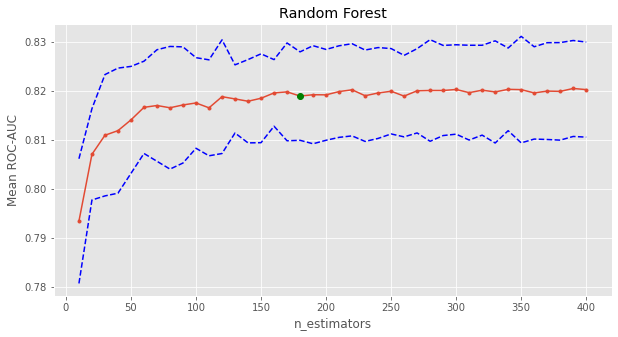

In [12]:
mean_test_score_forest = clf_forest.cv_results_["mean_test_score"]
std_test_score_forest = clf_forest.cv_results_["std_test_score"]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(forest_params["n_estimators"], mean_test_score_forest, marker='.')
ax.plot(forest_params["n_estimators"], mean_test_score_forest+1.96*std_test_score_forest, linestyle='--', color='b')
ax.plot(forest_params["n_estimators"], mean_test_score_forest-1.96*std_test_score_forest, linestyle='--', color='b')
ax.plot(180, mean_test_score_forest[np.array(forest_params["n_estimators"]) == 180], marker = 'o', color='g')
ax.set_xlabel("n_estimators")
ax.set_ylabel("Mean ROC-AUC")
ax.set_title('Random Forest');

**Ответ**: Считаю, что примерно на значении параметра `n_estimators=180` кроссвалидационная метрика стабилизируется. (Когда запустил заново, график немного изменился, но я уже не стал менять выбранное значение параметра).

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

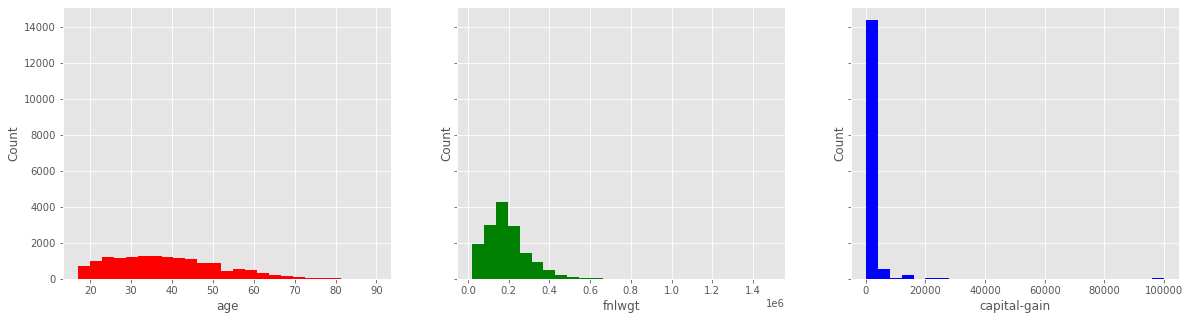

In [13]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))

features = [('age', 'r'), ('fnlwgt', 'g'), ('capital-gain', 'b')]

for i in range(len(features)):
    axes[i].hist(df_int_only[features[i][0]], bins = 25, color = features[i][1])
    axes[i].set_xlabel(features[i][0])
    axes[i].set_ylabel("Count")

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

**Ответ:** Из графиков видно, что признаки age, fnlwgt и capital-gain имеют разный диапазон значений, разное распределение. Эти факторы могут привести к тому, что одни признаки будут сильнее влиять, чем другие (kNN, SGD Linear Classifier). Решающие деревья нечувствительны к разным масштабам признаков. Масштабирование сможет улучшить работу kNN и SGD Linear Classifier.

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [14]:
scaler = StandardScaler()
scaler.fit(df_int_only)
df_int_only_scaled = scaler.transform(df_int_only)

In [15]:
# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 81)}

clf_knn = GridSearchCV(knn, knn_params, scoring='roc_auc')
clf_knn.fit(df_int_only_scaled, y)

mean_test_score_knn = clf_knn.cv_results_["mean_test_score"]
std_test_score_knn = clf_knn.cv_results_["std_test_score"]

# Дерево
tree = DecisionTreeClassifier()
tree_params = {"max_depth": range(1, 41)}

clf_tree = GridSearchCV(tree, tree_params, scoring='roc_auc')
clf_tree.fit(df_int_only_scaled, y)

mean_test_score_tree = clf_tree.cv_results_["mean_test_score"]
std_test_score_tree = clf_tree.cv_results_["std_test_score"]

# SGD Linear Classifier
sgd = SGDClassifier(max_iter=10000)
sgd_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                       'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}

clf_sgd = GridSearchCV(sgd, sgd_params, scoring='roc_auc')
clf_sgd.fit(df_int_only_scaled, y)

mean_test_score_sgd = clf_sgd.cv_results_["mean_test_score"]
std_test_score_sgd = clf_sgd.cv_results_["std_test_score"]

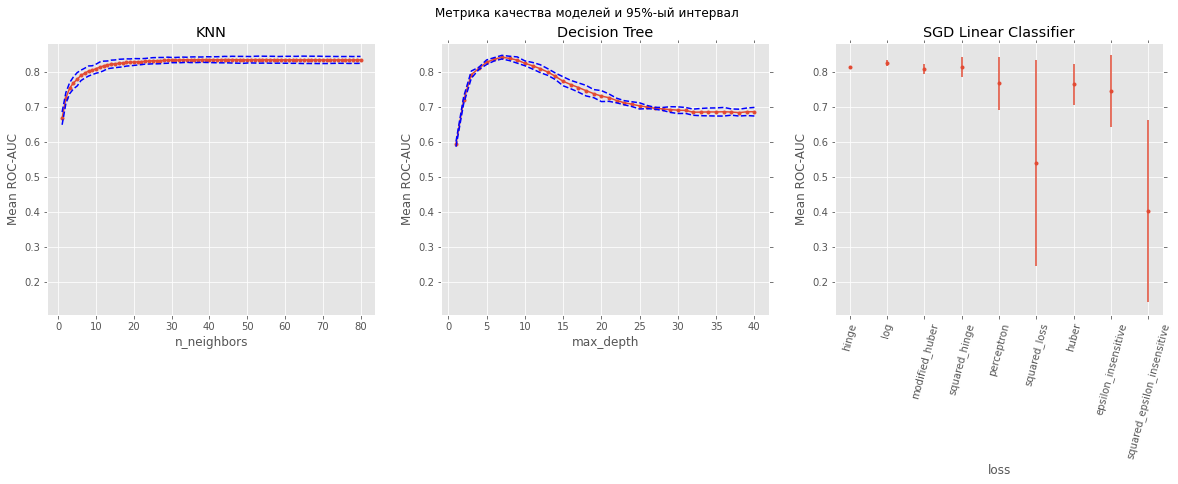

In [16]:
fig, axes = plt.subplots(1,3,sharey=True, figsize=(20, 5))
axes[0].plot(knn_params["n_neighbors"], mean_test_score_knn, marker='.')
axes[0].plot(knn_params["n_neighbors"], mean_test_score_knn+1.96*std_test_score_knn, linestyle='--', color='b')
axes[0].plot(knn_params["n_neighbors"], mean_test_score_knn-1.96*std_test_score_knn, linestyle='--', color='b')
axes[0].set_xlabel("n_neighbors")
axes[0].set_ylabel("Mean ROC-AUC")
axes[0].set_title('KNN')

axes[1].plot(tree_params["max_depth"], mean_test_score_tree, marker='.')
axes[1].plot(tree_params["max_depth"], mean_test_score_tree+1.96*std_test_score_tree, linestyle='--', color='b')
axes[1].plot(tree_params["max_depth"], mean_test_score_tree-1.96*std_test_score_tree, linestyle='--', color='b')
axes[1].set_xlabel("max_depth")
axes[1].set_ylabel("Mean ROC-AUC")
axes[1].set_title('Decision Tree')
axes[1].tick_params(reset=True)

axes[2].errorbar(sgd_params["loss"], mean_test_score_sgd, yerr = 1.96*std_test_score_sgd, linestyle = '', marker='.')
axes[2].set_xlabel("loss")
axes[2].set_ylabel("Mean ROC-AUC")
axes[2].set_title("SGD Linear Classifier")
axes[2].tick_params(reset=True)
plt.xticks(rotation = 75);
plt.suptitle("Метрика качества моделей и 95%-ый интервал");

In [17]:
print(clf_knn.best_params_, clf_knn.best_score_)
print(clf_tree.best_params_, clf_tree.best_score_)
print(clf_sgd.best_params_, clf_sgd.best_score_)

{'n_neighbors': 39} 0.8342380287757438
{'max_depth': 7} 0.8412509764390441
{'loss': 'log'} 0.8236586322926162


Изменилось ли качество у некоторых алгоритмов?

**Ответ:** как и следовало ожидать, качество алгоритмов KNN и SGD Linear Classifier заметно улучшилось. Качество решающего дерева не изменилось (поскольку оно не чувствительно к скалированию).

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [18]:
def best_params_info(model, model_name):
    print(model_name)
    for param, val in model.best_params_.items():
        print("{}:{}".format(param, val))
    print('ROC-AUC:{}'.format(model.best_score_))

In [19]:
# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 51), 'metric':['euclidean', 'manhattan', 'chebyshev']}

clf_knn = GridSearchCV(knn, knn_params, scoring='roc_auc')
clf_knn.fit(df_int_only_scaled, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': range(1, 51)},
             scoring='roc_auc')

In [20]:
best_params_info(clf_knn, "KNN")

KNN
metric:manhattan
n_neighbors:41
ROC-AUC:0.8344509490927339


In [21]:
# Дерево
tree = DecisionTreeClassifier()
tree_params = {"max_depth": range(1, 41), 'criterion':["gini", "entropy"]}

clf_tree = GridSearchCV(tree, tree_params, scoring='roc_auc')
clf_tree.fit(df_int_only_scaled, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 41)},
             scoring='roc_auc')

In [22]:
best_params_info(clf_tree, "Decision Tree")

Decision Tree
criterion:entropy
max_depth:8
ROC-AUC:0.8427290989803197


In [23]:
# SGD Linear Classifier
sgd = SGDClassifier(max_iter=10000)
sgd_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                       'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet']}

clf_sgd = GridSearchCV(sgd, sgd_params, scoring='roc_auc')
clf_sgd.fit(df_int_only_scaled, y)

GridSearchCV(estimator=SGDClassifier(max_iter=10000),
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron', 'squared_loss',
                                  'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='roc_auc')

In [24]:
best_params_info(clf_sgd, "SGD Linear Classifier")

SGD Linear Classifier
loss:log
penalty:l1
ROC-AUC:0.8213552873633125


In [25]:
# Random forest
forest = RandomForestClassifier(n_estimators=180)
forest_params = {"max_features": ['auto', 'sqrt', 'log2'], 'criterion':["gini", "entropy"]}

clf_forest = GridSearchCV(forest, forest_params, scoring = 'roc_auc')
clf_forest.fit(df_int_only_scaled, y)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=180),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [26]:
best_params_info(clf_forest, "Random Forest")

Random Forest
criterion:entropy
max_features:auto
ROC-AUC:0.8208680207560853


In [27]:
roc_auc_list = [{'KNN':clf_knn.best_score_, 
                 'Decision Tree':clf_tree.best_score_,
                 'SGD Linear Classifier': clf_sgd.best_score_,
                 'Random Forest':clf_forest.best_score_}]

Какой из алгоритмов имеет наилучшее качество? 

**Ответ:** Алгоритмом с лучшим качеством оказался случайный лес с параметрами `max_depth=12, criterion:entropy, n_estimators=180` 

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [28]:
import time
start_time = time.time()

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=41)
knn.fit(df_int_only_scaled, y)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.12404251098632812 seconds ---


In [29]:
start_time = time.time()

tree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
tree.fit(df_int_only_scaled, y)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.027523517608642578 seconds ---


In [30]:
start_time = time.time()

sgd = SGDClassifier(penalty = 'l1', loss='log')
sgd.fit(df_int_only_scaled, y)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.04702138900756836 seconds ---


In [31]:
start_time = time.time()

forest = RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators = 180)
forest.fit(df_int_only_scaled, y)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2.0486085414886475 seconds ---


**Ответ:** дольше всего обучается случайный лес, поскольку он состоит из нескольких классификаторов.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [32]:
df_ohe = pd.get_dummies(df, drop_first = True)
df_ohe.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,34,284843,9,594,0,60,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,40,190290,10,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,36,177858,13,0,0,40,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,22,184756,10,0,0,30,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,47,149700,13,15024,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [33]:
X = np.concatenate((df_int_only_scaled, df_ohe.iloc[:, 6:].values), axis=1)
X.shape

(15347, 56)

In [34]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=41)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
sgd = SGDClassifier(penalty = 'l1', loss='log')
forest = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators = 180)

In [35]:
roc_auc_list = roc_auc_list + [{'KNN':cross_val_score(knn, X, y, scoring='roc_auc').mean(), 
                                'Decision Tree':cross_val_score(tree, X, y, scoring='roc_auc').mean(),
                                'SGD Linear Classifier': cross_val_score(sgd, X, y, scoring='roc_auc').mean(),
                                'Random Forest':cross_val_score(forest, X, y, scoring='roc_auc').mean()}]

In [36]:
results = pd.DataFrame(roc_auc_list)
results.index = ['Без категориальных признаков', 'C категориальными признаками']
results

,KNN,Decision Tree,SGD Linear Classifier,Random Forest
Без категориальных признаков,0.834451,0.842729,0.821355,0.820868
C категориальными признаками,0.890718,0.891014,0.900463,0.901873


Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

**Ответ:** Да, из приведенной таблицы видно, что качество всех моделей выросло после добавления категориальных переменных

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [37]:
# У МЕНЯ ЭТА ЯЧЕЙКА ВЫПОЛНЯЛАСЬ 20 МИНУТ

from tqdm import tqdm

alphas = np.linspace(0, 1, 100)
cv_roc_auc_mean = []
for alpha in tqdm(alphas):
    kf = KFold()
    cv_roc_auc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        sgd.fit(X_train, y_train)
        forest.fit(X_train, y_train)

        y_proba = alpha*sgd.predict_proba(X_test)[:,1]+(1-alpha)*forest.predict_proba(X_test)[:,1]
        cv_roc_auc.append(roc_auc_score(y_test, y_proba))
        
    cv_roc_auc_mean.append(np.array(cv_roc_auc).mean())

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [21:59<00:00, 13.19s/it]


Best alpha: 0.5050505050505051
Best ROC-AUC: 0.909435153710562


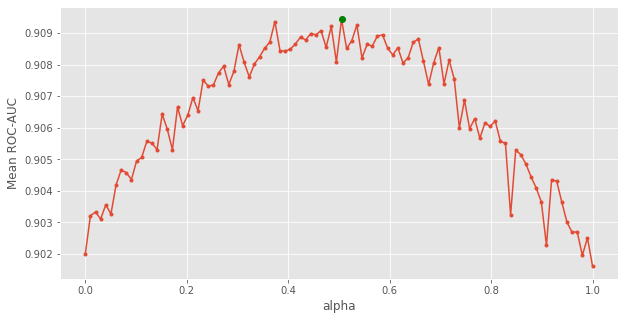

In [38]:
cv_roc_auc_mean = np.array(cv_roc_auc_mean)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, cv_roc_auc_mean, marker='.')
ax.plot(alphas[cv_roc_auc_mean == cv_roc_auc_mean.max()], cv_roc_auc_mean.max(), marker='o', color='g')
ax.set_xlabel('alpha')
ax.set_ylabel('Mean ROC-AUC')
print('Best alpha: {}'.format(float(alphas[cv_roc_auc_mean == cv_roc_auc_mean.max()])))
print('Best ROC-AUC: {}'.format(cv_roc_auc_mean.max()))

**Ответ:** По сравнению с базовыми моделями, наш ансамбль (если можно его так назвать) немного лучше :) (но не особо).

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [39]:
best_alpha = alphas[cv_roc_auc_mean == cv_roc_auc_mean.max()]
cv_roc_auc = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sgd.fit(X_train, y_train)
    forest.fit(X_train, y_train)

    y_proba = best_alpha*sgd.predict_proba(X_test)[:,1]+(1-best_alpha)*forest.predict_proba(X_test)[:,1]
    cv_roc_auc.append(roc_auc_score(y_test, y_proba))

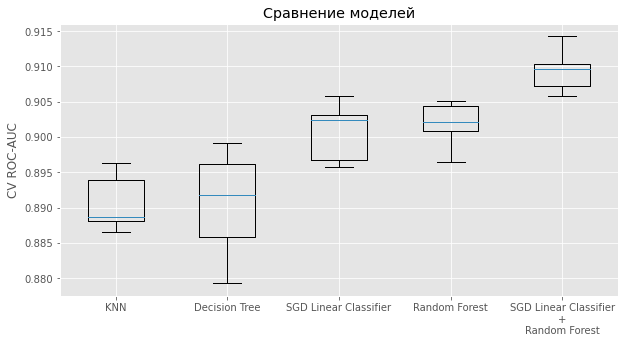

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot([cross_val_score(knn, X, y, scoring='roc_auc'),
            cross_val_score(tree, X, y, scoring='roc_auc'),
            cross_val_score(sgd, X, y, scoring='roc_auc'),
            cross_val_score(forest, X, y, scoring='roc_auc'),
            cv_roc_auc])
ax.set_xticklabels(['KNN', 'Decision Tree', 'SGD Linear Classifier', 'Random Forest', 
                    'SGD Linear Classifier\n+\nRandom Forest'])
ax.set_ylabel('CV ROC-AUC')
plt.title('Сравнение моделей');

KNN считает расстояния между объектами, поэтому он может плохо работать, когда признаки имеют сильно разный диапазон значений. SGD тоже не очень хоршо справляется с такими признаками, поскольку он использует их линейную комбинацию. Решающие деревья в каждом узле проверяют некоторое отдельное условие, которое касается только одного конкретного признака, поэтому для него признаки с разным диапазоном значений не проблема. Случайный лес имеет хорошую предсказательную силу, но его недостаток заключается в более длительном обучении. Гиперапарметры каждой модели позволяют лучше подстроиться под конкретную задачу.